### 広告キャンペーンによる売上データ（オープンデータ）を分析してみた
データ：https://www.kaggle.com/loveall/clicks-conversion-tracking

このプロジェクトで使用したデータは、匿名の組織のソーシャルメディア広告キャンペーンのものです。データファイルはここからダウンロードできます。ファイル conversion_data.csvは、11の変数で1143個のオブザベーションを含んでいます。以下、変数の説明です。

1.) ad_id: 各広告に固有のID。

2.) xyzcampaignid: XYZ会社の各広告キャンペーンに関連付けられたID。

3.) fbcampaignid: Facebookがどのように各キャンペーンを追跡するかに関連付けられたID。

4.) age：広告が表示される人の年齢。

5.) gender: 広告が表示される人の性別

6.) interest: その人の興味が属するカテゴリを指定するコード(興味はその人のFacebookの公開プロフィールに記載されているもの)。

7.) impression：広告が表示された回数。

8.) click：その広告のクリック数。

9.) spent：金額は、その広告を表示するには、Facebookに会社xyzによって支払われた。

10.) Total_Conversion : 広告を見た後、製品について問い合わせた人の総数。

11.) Approved_Conversion : 広告を見て商品を購入した人の総数。


In [ ]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import sklearn

In [ ]:
# まずはデータを見てみる
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/marketing/KAG_conversion_data.csv')
df.head(10)

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion
0,708746,916,103916,30-34,M,15,7350,1,1.43,2,1
1,708749,916,103917,30-34,M,16,17861,2,1.82,2,0
2,708771,916,103920,30-34,M,20,693,0,0.00,1,0
3,708815,916,103928,30-34,M,28,4259,1,1.25,1,0
4,708818,916,103928,30-34,M,28,4133,1,1.29,1,1
5,708820,916,103929,30-34,M,29,1915,0,0.00,1,1
6,708889,916,103940,30-34,M,15,15615,3,4.77,1,0
7,708895,916,103941,30-34,M,16,10951,1,1.27,1,1
8,708953,916,103951,30-34,M,27,2355,1,1.50,1,0
9,708958,916,103952,30-34,M,28,9502,3,3.16,1,0


In [ ]:
# 基本統計量を，少数第3位まで表示
pd.options.display.float_format = '{:.3f}'.format
df.describe()

,ad_id,xyz_campaign_id,fb_campaign_id,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion
count,1143.000,1143.000,1143.000,1143.000,1143.000,1143.000,1143.000,1143.000,1143.000
mean,987261.130,1067.382,133783.990,32.766,186732.133,33.390,51.361,2.856,0.944
std,193992.815,121.629,20500.309,26.952,312762.183,56.892,86.908,4.484,1.738
min,708746.000,916.000,103916.000,2.000,87.000,0.000,0.000,0.000,0.000
25%,777632.500,936.000,115716.000,16.000,6503.500,1.000,1.480,1.000,0.000
50%,1121185.000,1178.000,144549.000,25.000,51509.000,8.000,12.370,1.000,1.000
75%,1121804.500,1178.000,144657.500,31.000,221769.000,37.500,60.025,3.000,1.000
max,1314415.000,1178.000,179982.000,114.000,3052003.000,421.000,639.950,60.000,21.000


In [ ]:
# 欠損値がないか確認
df.isnull().sum()

ad_id                  0
xyz_campaign_id        0
fb_campaign_id         0
age                    0
gender                 0
interest               0
Impressions            0
Clicks                 0
Spent                  0
Total_Conversion       0
Approved_Conversion    0
dtype: int64

In [ ]:
# データ型確認
df.dtypes

ad_id                    int64
xyz_campaign_id          int64
fb_campaign_id           int64
age                     object
gender                  object
interest                 int64
Impressions              int64
Clicks                   int64
Spent                  float64
Total_Conversion         int64
Approved_Conversion      int64
dtype: object

In [ ]:
# 固有値確認
for i in range(6):
  print(df.columns[i])
  print(len(df.iloc[:, i].unique()))
  print(df.iloc[:, i].unique())
  print('----')

ad_id
1143
[ 708746  708749  708771 ... 1314412 1314414 1314415]
----
xyz_campaign_id
3
[ 916  936 1178]
----
fb_campaign_id
691
[103916 103917 103920 103928 103929 103940 103941 103951 103952 103955
 103962 103965 103968 103976 103978 103979 103988 103989 104012 104013
 104034 104049 104061 104085 104108 104109 104133 104140 104185 104205
 104220 104228 104229 104230 104239 104252 104265 104270 104272 104285
 104287 104328 104396 104419 104423 104438 104467 108654 108655 108660
 108664 108665 108668 108672 108678 108680 108683 108686 108689 108690
 108691 108692 108716 108720 108729 108730 108740 108742 108750 108752
 108753 108761 108762 108764 108766 108770 108774 108776 108781 108786
 108788 108791 108792 108793 108794 108797 108804 108809 108810 108811
 108817 108818 108822 108823 108826 108827 108834 108836 109448 109451
 109452 109470 109472 109473 109498 109507 109553 109565 109601 109629
 109633 109637 109659 109689 109698 109706 109714 109717 109731 109738
 109788 109808 1098

In [ ]:
# 相関を見たい数値(クリック数，広告表示にかけたコスト，問い合わせ数，購入数)を抜き出す
df_nums = df.iloc[:, [6, 7, 8, 9, 10]]
df_nums.head(3)

,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion
0,7350,1,1.4,2,1
1,17861,2,1.8,2,0
2,693,0,0.0,1,0


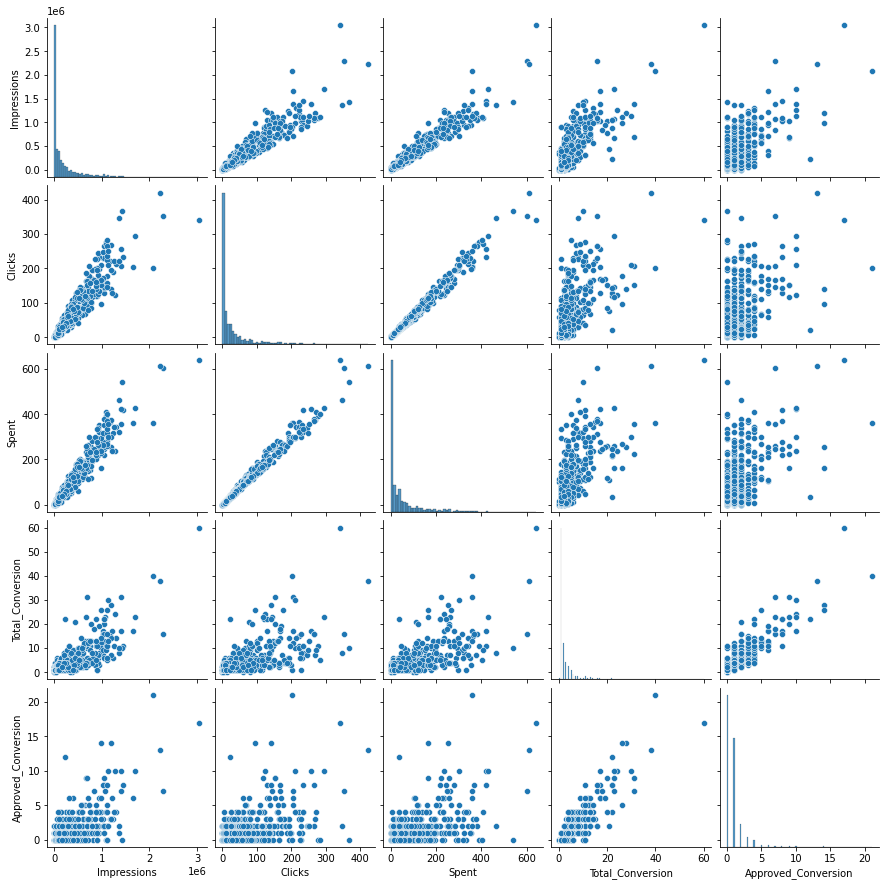

In [ ]:
# ペアプロット図でそれぞれの特徴量同士の相関をみる
import seaborn as sns

sns.pairplot(df_nums)

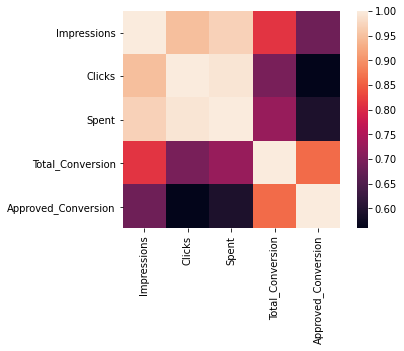

In [ ]:
# ヒートマップで相関をもっとわかりやすく可視化
sns.heatmap(df_nums.corr(), square=True);

基本的に全ての数値に相関があるが，特に相関が強い(0.8以上)のは
- SpentとClick
- SpentとImpression
- ImpressionとClick
- Total_comversionとApproved_comversion
- Total_comversionとImpressions

In [ ]:
# キャンペーン種類別に特徴を見てみる
group_canpaign = df.groupby(df['xyz_campaign_id'])
group_canpaign.groups.keys()

dict_keys([916, 936, 1178])

In [ ]:
# キャンペーン番号916で反応を示した年齢・性別人数と購入率
campaign_916 = group_canpaign.get_group(916)
num_916 = campaign_916.groupby(['age', 'gender']).count()['ad_id']
print(num_916)
campaign_916.groupby(['age', 'gender']).sum()['Approved_Conversion'] / num_916

age    gender
30-34  F         11
       M         18
35-39  F          3
       M          9
40-44  F          1
       M          5
45-49  F          4
       M          3
Name: ad_id, dtype: int64


age    gender
30-34  F        0.4
       M        0.4
35-39  F        0.3
       M        0.6
40-44  F        1.0
       M        0.6
45-49  F        0.5
       M        0.3
dtype: float64

多分商品916は30〜34才男性向け広告が一番人数が多いけど，購入率が高いのは35-39, 40-44才男性向け広告

In [ ]:
# キャンペーン番号936で反応を示した年齢・性別人数と購入率
campaign_936 = group_canpaign.get_group(936)
num_936 = campaign_936.groupby(['age', 'gender']).count()['ad_id']
print(num_936)
campaign_936.groupby(['age', 'gender']).sum()['Approved_Conversion'] / num_936

age    gender
30-34  F         97
       M         99
35-39  F         49
       M         40
40-44  F         46
       M         29
45-49  F         64
       M         40
Name: ad_id, dtype: int64


age    gender
30-34  F        0.4
       M        0.5
35-39  F        0.4
       M        0.3
40-44  F        0.3
       M        0.4
45-49  F        0.4
       M        0.3
dtype: float64

商品936は，30-34才の顧客が圧倒的多数で，30-34才男性向け広告の購入率が高い．けど全体的に同じくらいの効果

In [ ]:
# キャンペーン番号1178で反応を示した年齢・性別人数と購入率
campaign_1178 = group_canpaign.get_group(1178)
num_1178 = campaign_1178.groupby(['age', 'gender']).count()['ad_id']
print(num_1178)
campaign_1178.groupby(['age', 'gender']).sum()['Approved_Conversion'] / num_1178

age    gender
30-34  F          89
       M         112
35-39  F          57
       M          90
40-44  F          60
       M          69
45-49  F          70
       M          78
Name: ad_id, dtype: int64


age    gender
30-34  F        1.7
       M        2.2
35-39  F        1.3
       M        1.1
40-44  F        1.3
       M        0.9
45-49  F        1.2
       M        1.1
dtype: float64

商品1178も30-34才向けの広告が多くて，購入率もそこが一番高い．一つの広告で複数人釣れているケースが多いらしい．したがってこれらの広告の特徴を真似て作ってみるといい感じに効果が出るのかもしれない

In [ ]:
from sklearn.preprocessing import StandardScaler

# 因子分析してみる

# データを標準化
sc = StandardScaler()
sc.fit(df_nums)

x = sc.transform(df_nums)
print(x.shape)
x

(1143, 5)


array([[-0.57379269, -0.5695727 , -0.57477185, -0.19092221,  0.03223643],
       [-0.54017097, -0.55198797, -0.57028241, -0.19092221, -0.54348614],
       [-0.59508655, -0.58715742, -0.59123316, -0.41405523, -0.54348614],
       ...,
       [-0.11259846, -0.09478519, -0.12743878, -0.19092221, -0.54348614],
       [ 1.9304925 ,  1.7867801 ,  1.69619753,  1.14787588,  0.60795901],
       [ 1.04415359,  1.41750093,  1.31517011,  0.47847683,  0.60795901]])

In [ ]:
from sklearn.decomposition import FactorAnalysis as FA

# 因子の数
n_components = 3

# 因子分析
fa = FA(n_components, max_iter=5000).fit(x)
num_fitted = fa.transform(x)

print(num_fitted.shape)
num_fitted

(1143, 3)


array([[-0.56675378,  0.29229583,  0.33001338],
       [-0.55726135,  0.21365229,  0.23779881],
       [-0.59276582, -0.01089139,  0.06677945],
       ...,
       [-0.12089421, -0.18966178, -0.05217192],
       [ 1.75112111, -0.09797203, -0.56595266],
       [ 1.3085002 , -0.81564628,  0.58125195]])

In [ ]:
# 因子負荷量．つまり因子の影響度
fa.components_.T

array([[ 0.9740275 ,  0.15832523, -0.11876898],
       [ 0.99332585, -0.07904247,  0.05471436],
       [ 0.99844099, -0.02469845, -0.01508708],
       [ 0.74394913,  0.63634874,  0.10693018],
       [ 0.61020661,  0.63132945,  0.07386974]])

In [ ]:
Factor_loading_matrix = fa.components_.T

pd.DataFrame(Factor_loading_matrix,
             columns=['第1因子', '第2因子', '第3因子'],
             index= [df_nums.columns])

,第1因子,第2因子,第3因子
Impressions,0.974,0.158,-0.119
Clicks,0.993,-0.079,0.055
Spent,0.998,-0.025,-0.015
Total_Conversion,0.744,0.636,0.107
Approved_Conversion,0.610,0.631,0.074


- 第一因子：総合的な効果度合い
- 第二因子：本当に商品に対して興味を持たせることができた度合い
- 第三因子：不明

因子負荷量の数値が大きいほど，その変数に対する因子の影響度（相関）が大きくなる．